<a href="https://colab.research.google.com/github/pranavkantgaur/ML-course/blob/main/ml_lec_x_random_forrest_tree_car_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Ensembling technique
* Bagging(Bootstrap aggregation)
  * Splitting dataset of size n with replacement into m subsets of size k where k <= n, where m is the number of homogenous base-learners
  * How to  aggregate the results? Voting, or averaging, ... think.
  * Merits:
    * Reduces variance, how? 
* Boosting: https://scikit-learn.org/stable/modules/ensemble.html#adaboost
  * Sequential model building based on data-reweighing (difficult data has higher weight than sinpler data)
  * Merits:
    * Reduces bias
* Stacking:
  * bagging with heterogenous base-learns + meta-classifier
  * Merits:
    * ??
* Cascading: 
  * Heterogenous boosting

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


# use for both decision and random forest



In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [4]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('/content/car_evaluation.csv')
df.head()
#df

,buy_price,maintenance_cost,no_of_doors,no_of_persons,boot_space,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Putting feature variable to X
X = df.drop('decision',axis=1)
# Putting response variable to y
y = df['decision']

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
#feature_list = ['Outlook', 'Temperature', 'Humidity', 'Windy']
feature_list = X.columns
print(feature_list)
for feature in feature_list:
  feature_column = X[feature]
  le.fit(feature_column)
  print(le.classes_)
  X[feature] = le.transform(feature_column)

Index(['buy_price', 'maintenance_cost', 'no_of_doors', 'no_of_persons',
       'boot_space', 'safety'],
      dtype='object')
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2]
[0 1 2]
[0 1 2]


In [10]:
print(X)

      buy_price  maintenance_cost  no_of_doors  no_of_persons  boot_space  \
0             3                 3            0              0           2   
1             3                 3            0              0           2   
2             3                 3            0              0           2   
3             3                 3            0              0           1   
4             3                 3            0              0           1   
...         ...               ...          ...            ...         ...   
1723          1                 1            3              2           1   
1724          1                 1            3              2           1   
1725          1                 1            3              2           0   
1726          1                 1            3              2           0   
1727          1                 1            3              2           0   

      safety  
0          1  
1          2  
2          0  
3          1  


In [11]:
le.fit(y)
y = le.transform(y)
print(y)

[2 2 2 ... 2 1 3]


In [12]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [13]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf = DecisionTreeClassifier(random_state=0, criterion="entropy")
#clf.fit(X_train, y_train)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [20]:
print(clf.score(X_train,y_train),clf.score(X_test,y_test))

1.0 0.9672447013487476


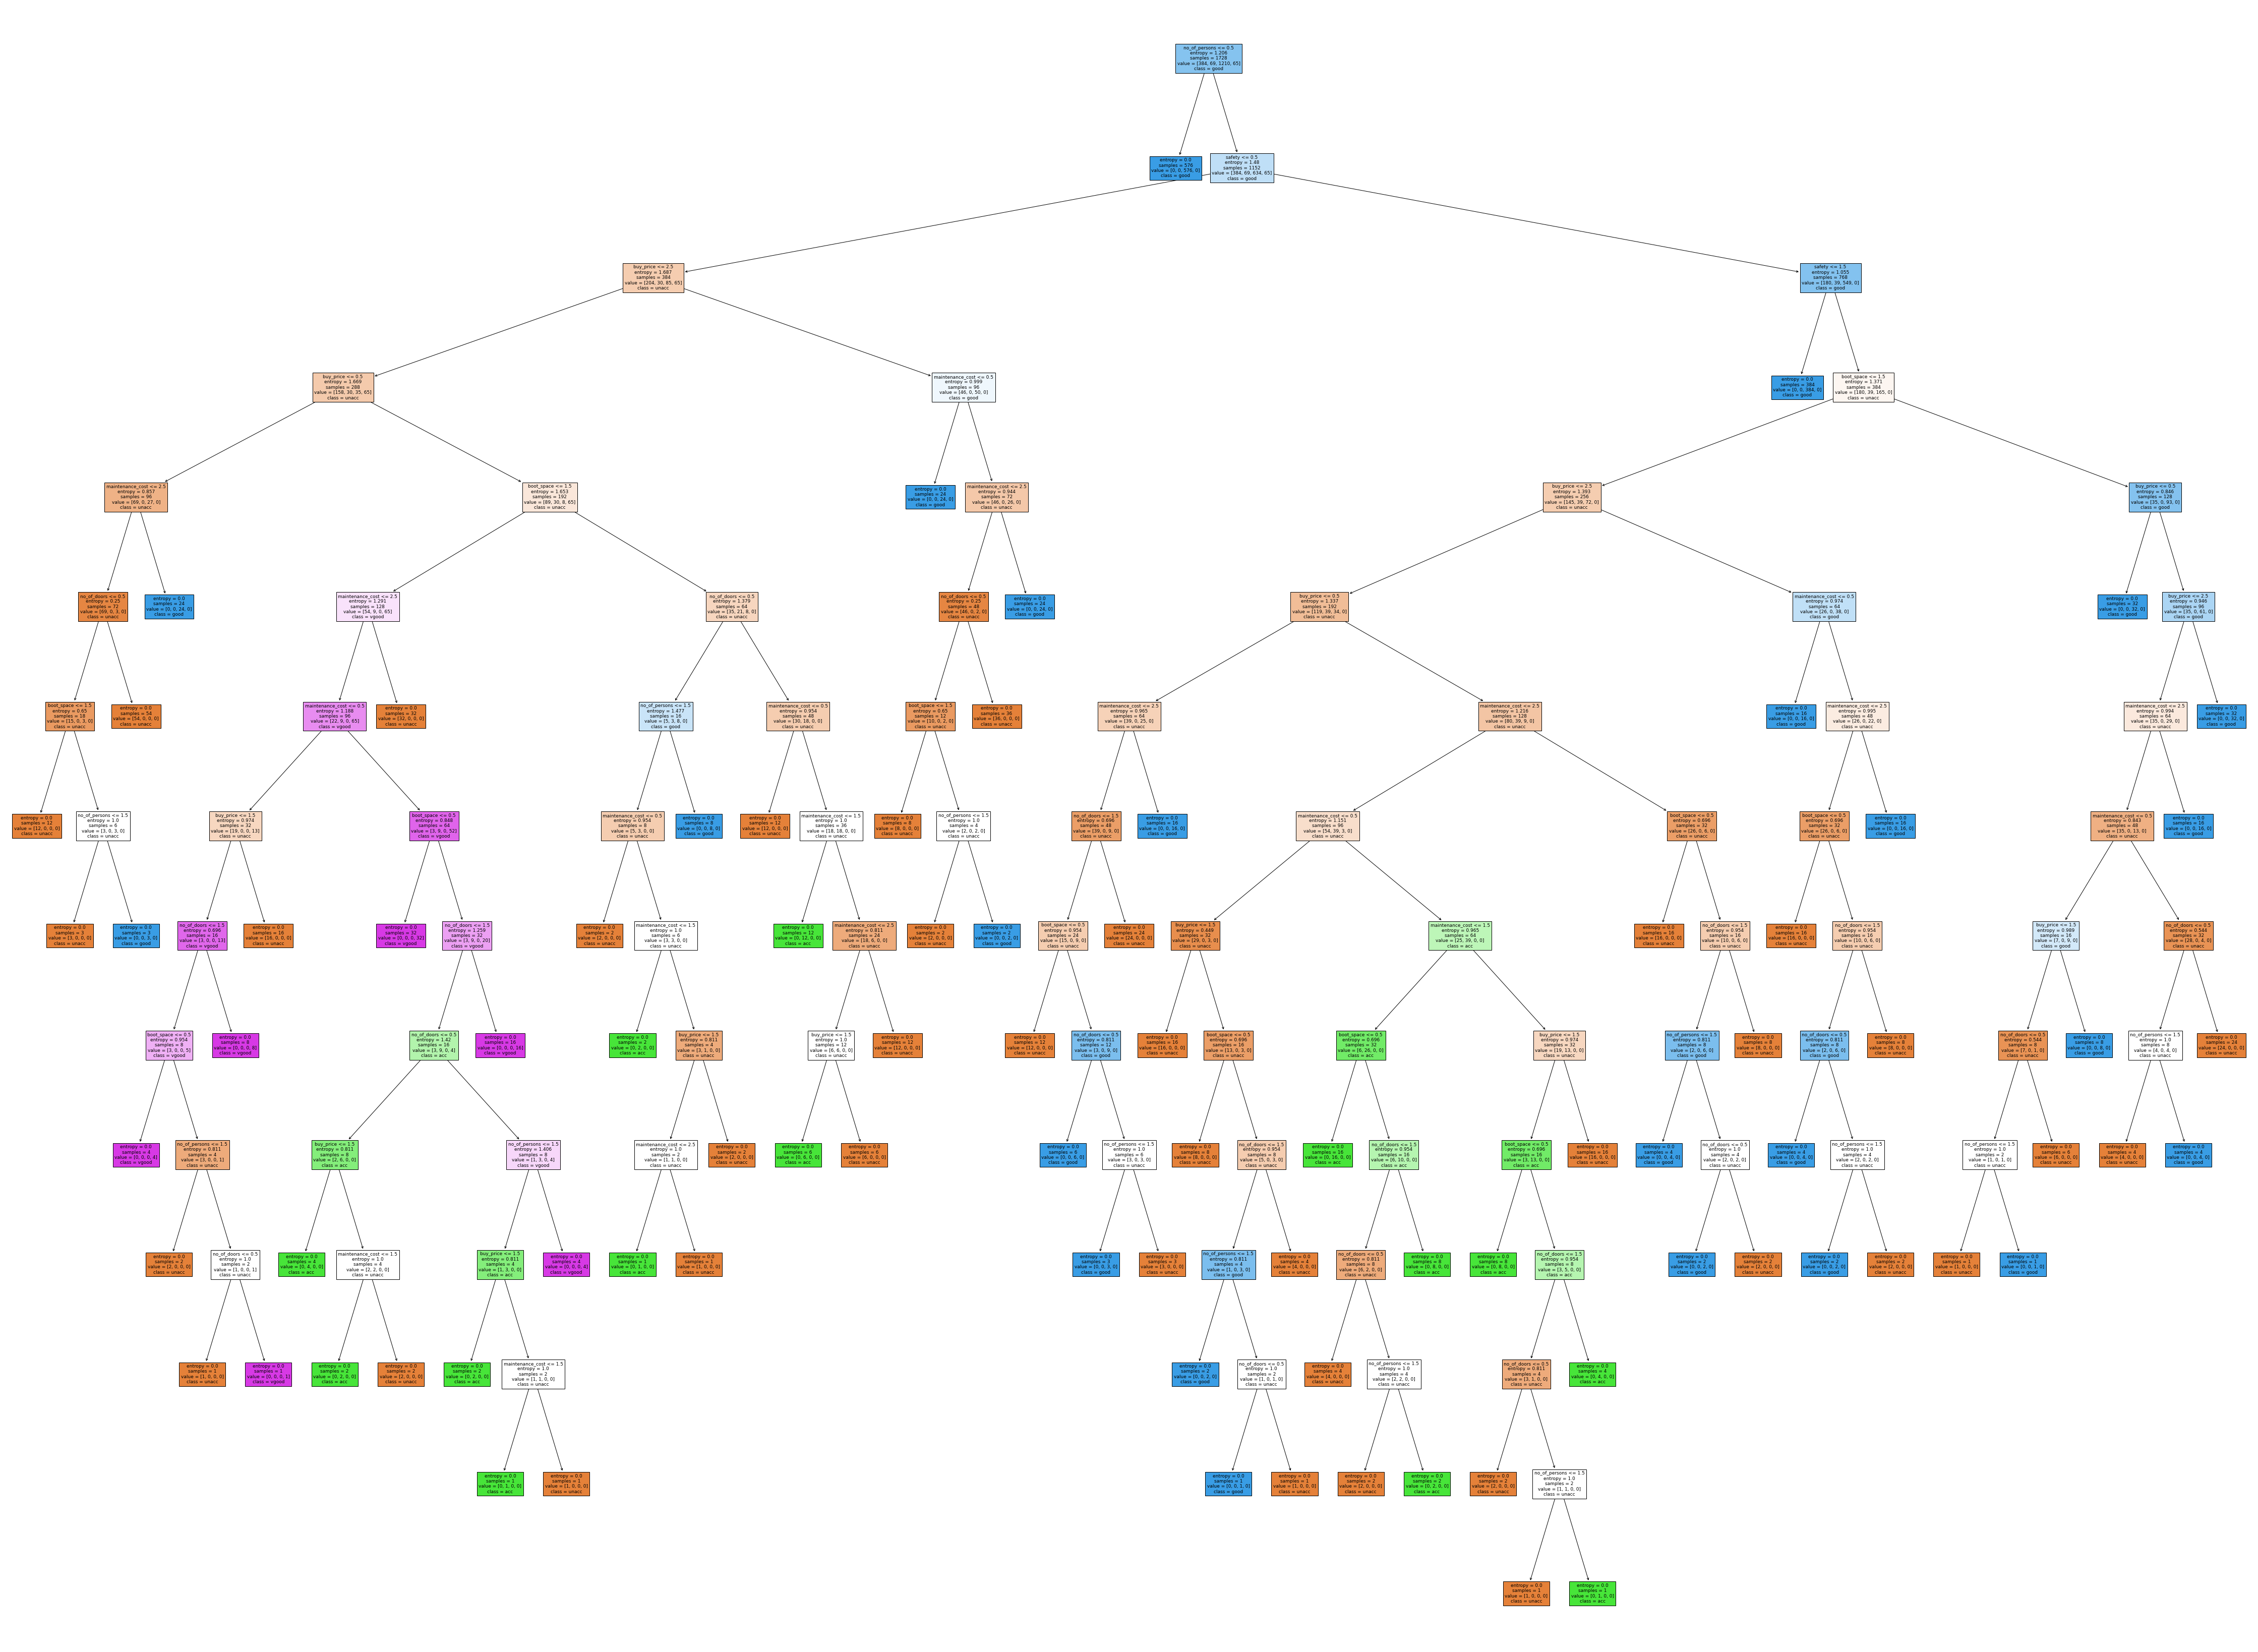

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize = (80, 60))
plot_tree(clf, feature_names = X.columns,class_names=['unacc', "acc", 'good', 'vgood'],filled=True);

In [28]:
# Decreasing overfitting by increasing min split threshold
# can also explain bias vs variance
# can plot knee-elbow for min-sample split
clf = DecisionTreeClassifier(random_state=0, criterion="entropy",min_samples_split=32)
#clf.fit(X_train, y_train)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=32,
                       random_state=0)

In [29]:
print(clf.score(X_train,y_train),clf.score(X_test,y_test))

0.9470636889991728 0.9325626204238922


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20,
                                       n_estimators=20, oob_score=True)

In [43]:
#%%time
classifier_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(max_depth=20, n_estimators=20, n_jobs=-1, oob_score=True,
                       random_state=42)

In [44]:
# checking the oob score, what is this?
classifier_rf.oob_score_

0.9487179487179487

In [45]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [46]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [49]:
grid_search.best_score_

0.9213985968133237

In [50]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

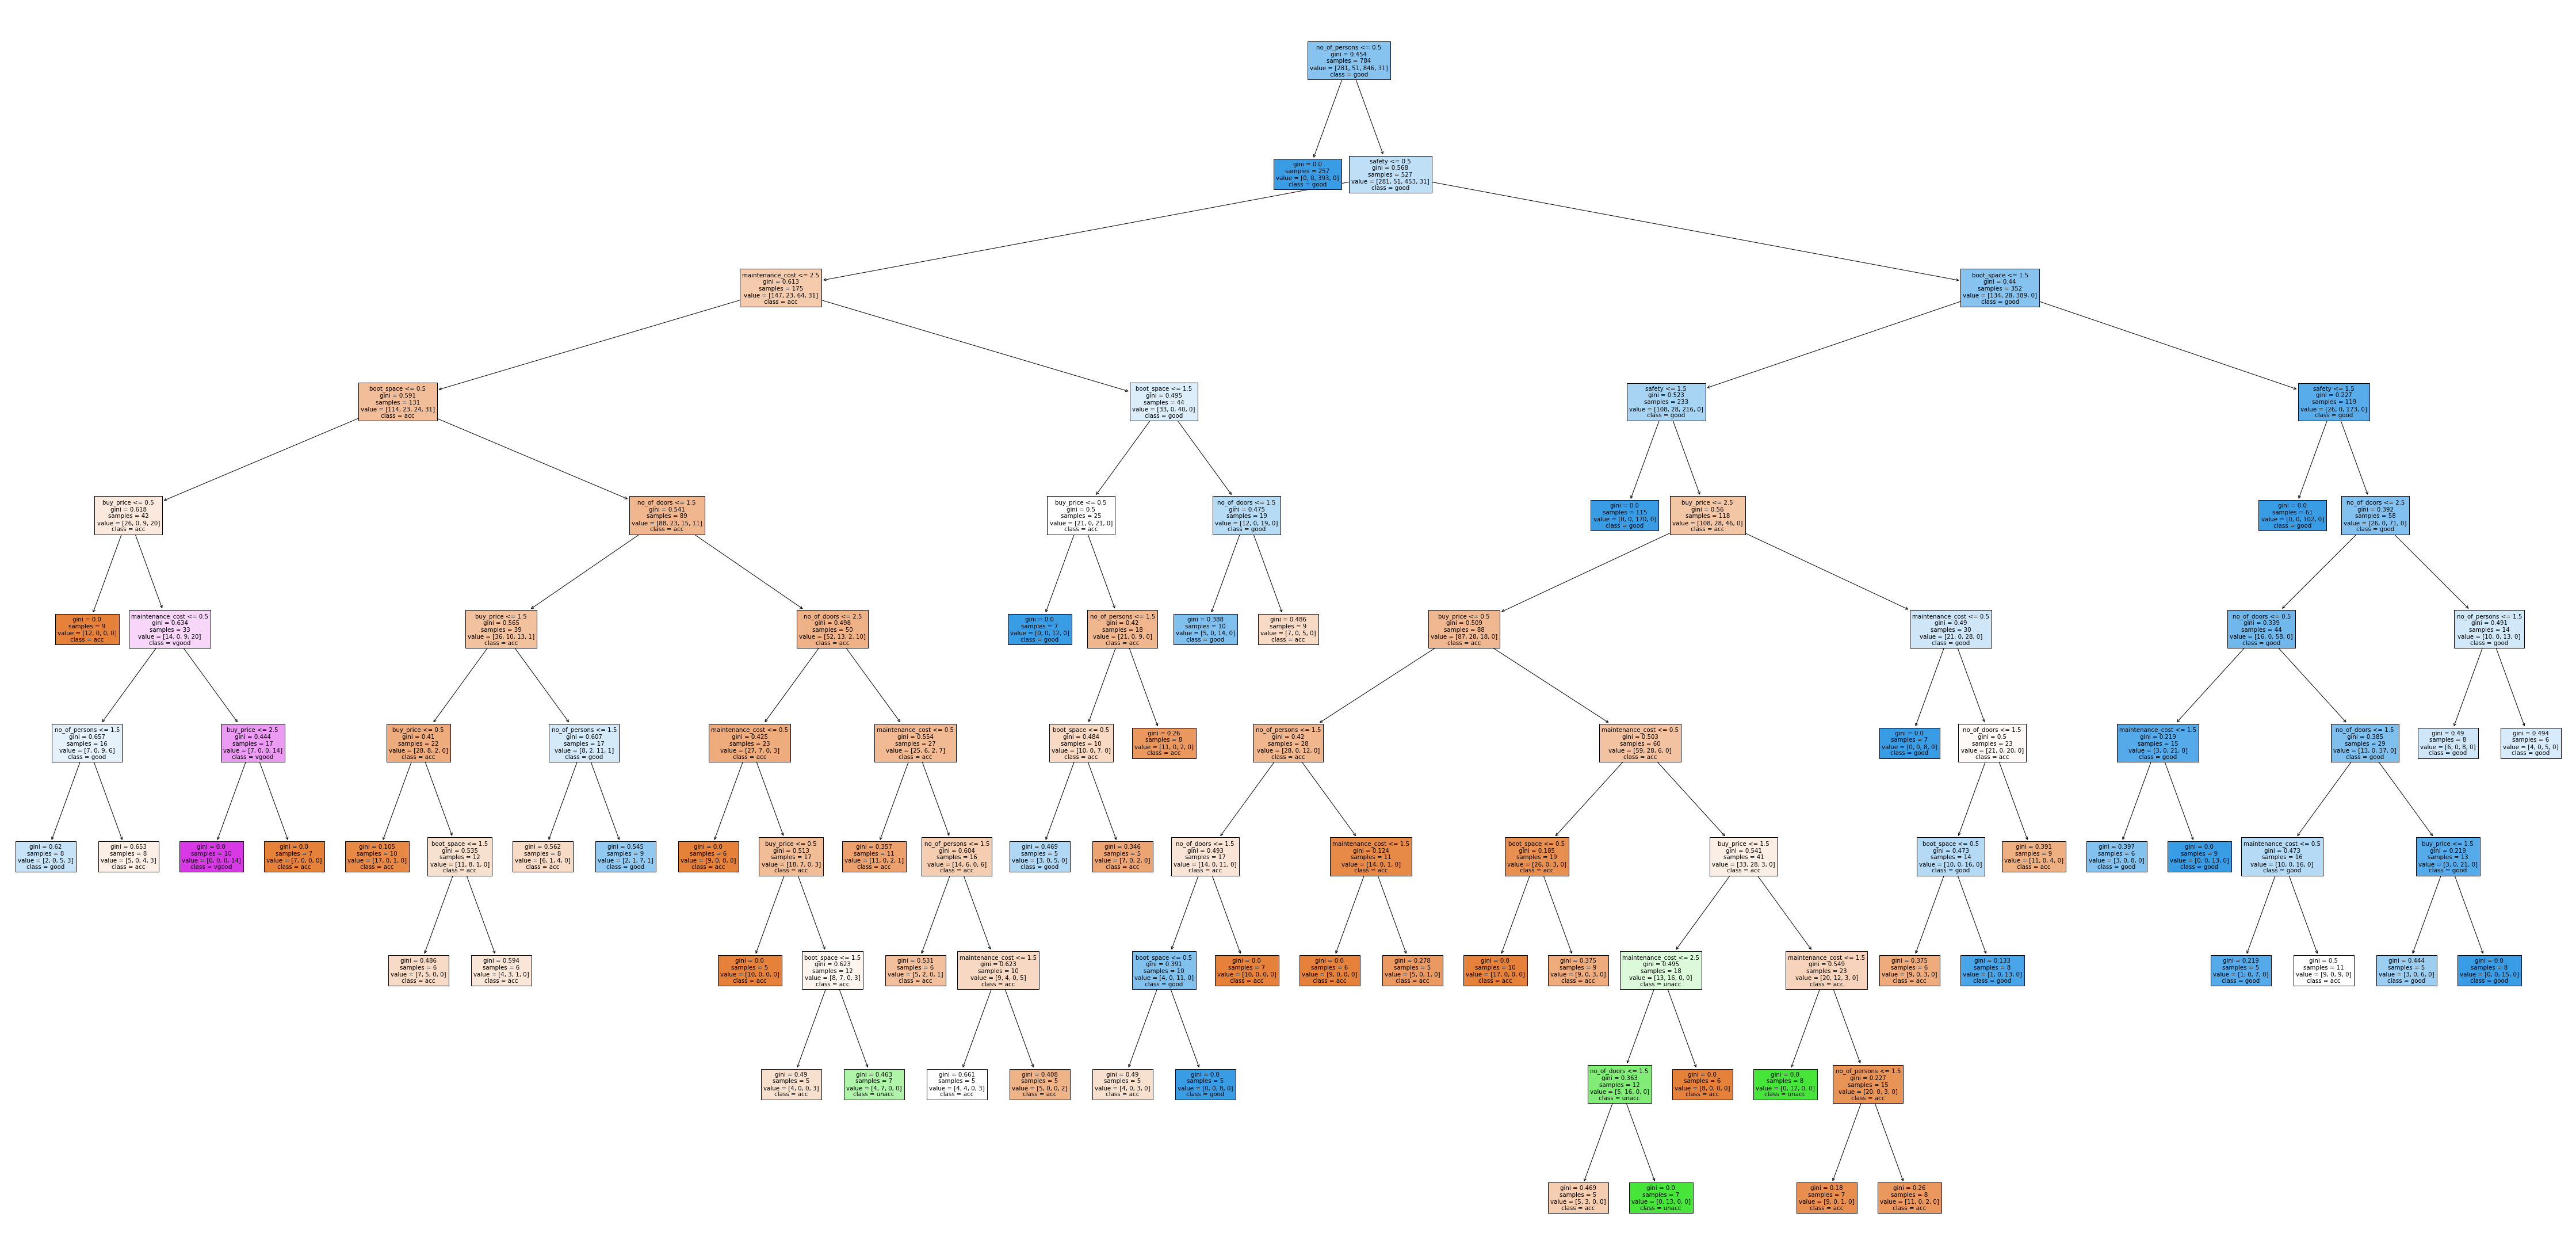

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['acc', 'unacc', 'good', 'vgood'],filled=True);

### Bias vs Variance
High  Low combinations of bias and variance

Underfitting an overfitting phenomena

Decision tree-overffiting : Post and Pre prunning of decision trees

How Random forrest fixes overfitting

Bagging for overfitting

Boosting for under-fitting

